<a href="https://colab.research.google.com/github/cate0123/data_science_assignment1/blob/main/Assigment_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a) **K-Means clustering algorithm **

Here are steps of implementing K-Means clustering in python:
1. Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer


2. Uploading the dataset

In [2]:
from google.colab import files
uploaded = files.upload()

# get the exact file name
filename = list(uploaded.keys())[0]
print("Loaded file:", filename)

# read csv with the correct name
df = pd.read_csv(filename)
print(df.head())

Saving Question 2 Datasets .csv to Question 2 Datasets .csv
Loaded file: Question 2 Datasets .csv
   Index   Amount  Time_Hour Location Merchant  Is_Fraud (Labeled Subset)
0      0   816.44          7      ATM   Retail                        0.0
1      1   999.96          1      ATM  Grocery                        0.0
2      2  1443.20          7   Online     Food                        0.0
3      3   222.09         12      ATM     Food                        0.0
4      4   288.64         12   Online  Grocery                        0.0


3.Preprocessing the Data

In [3]:
# Define features
num_features = ["Amount", "Time_Hour"]
cat_features = ["Location", "Merchant"]

# Preprocessing: scale numerical, encode categorical
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(), cat_features)
])

X = preprocessor.fit_transform(df)


4.Choosing the number of clusters(k)

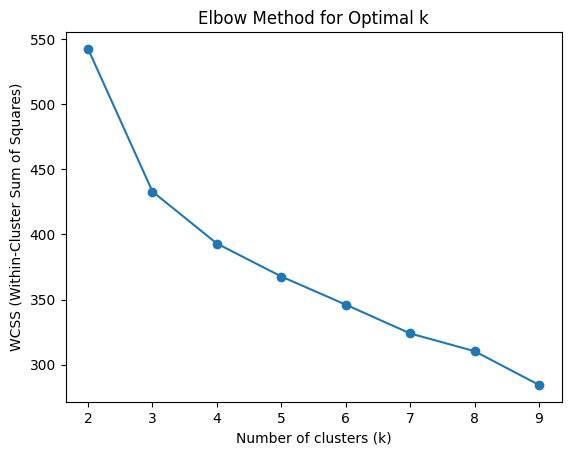

In [4]:
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 10), wcss, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()


5.Fiit the K-means with the choosen K

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

df["Cluster"] = clusters
print(df.head())


   Index   Amount  Time_Hour Location Merchant  Is_Fraud (Labeled Subset)  \
0      0   816.44          7      ATM   Retail                        0.0   
1      1   999.96          1      ATM  Grocery                        0.0   
2      2  1443.20          7   Online     Food                        0.0   
3      3   222.09         12      ATM     Food                        0.0   
4      4   288.64         12   Online  Grocery                        0.0   

   Cluster  
0        2  
1        2  
2        2  
3        1  
4        1  


6.Visualize the clusters

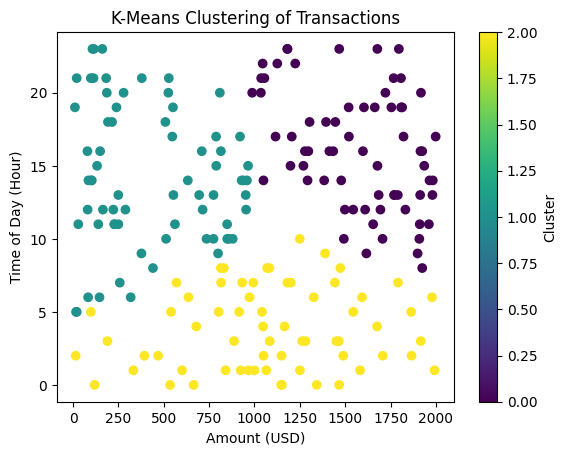

In [6]:
plt.scatter(df["Amount"], df["Time_Hour"], c=df["Cluster"], cmap="viridis")
plt.xlabel("Amount (USD)")
plt.ylabel("Time of Day (Hour)")
plt.title("K-Means Clustering of Transactions")
plt.colorbar(label="Cluster")
plt.show()


b) Naive Bayes Algorithm

Here are steps of implementing the naive bayes algorithm:
1. Importing the libraries

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


2. Data preparation

In [10]:
df = pd.read_csv("Question 2 Datasets .csv")   # change filename if needed
print("First rows of dataset:")
print(df.head())

First rows of dataset:
   Index   Amount  Time_Hour Location Merchant  Is_Fraud (Labeled Subset)
0      0   816.44          7      ATM   Retail                        0.0
1      1   999.96          1      ATM  Grocery                        0.0
2      2  1443.20          7   Online     Food                        0.0
3      3   222.09         12      ATM     Food                        0.0
4      4   288.64         12   Online  Grocery                        0.0


3. Define the features and the target

In [12]:
num_features = ["Amount", "Time_Hour"]
cat_features = ["Location", "Merchant"]

# Features
X = df[num_features + cat_features]

# Target (rename column properly)
y = df["Is_Fraud (Labeled Subset)"]


4.  Preprocessing (scale numeric + encode categorical)

In [13]:
reprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

X_processed = preprocessor.fit_transform(X)

5.Split into train and test sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42, stratify=y
)

print("\nData split complete.")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Data split complete.
Training set size: (140, 10)
Testing set size: (60, 10)


Step 2: Calculate Prior Probabilities

In [15]:
class_counts = y_train.value_counts()   # fix typo here
total_samples = len(y_train)
priors = class_counts / total_samples
print("\nPrior Probabilities P(c):")
print(priors)



Prior Probabilities P(c):
Is_Fraud (Labeled Subset)
-1.0    0.500000
 0.0    0.471429
 1.0    0.028571
Name: count, dtype: float64


Step 3: Train Model (Bayes’ theorem applied internally)

In [16]:
nb_model = GaussianNB()
nb_model.fit(X_train.toarray() if hasattr(X_train, "toarray") else X_train, y_train)

GaussianNB()

Step 4: Make Predictions

In [17]:
y_pred = nb_model.predict(X_test.toarray() if hasattr(X_test, "toarray") else X_test)

print("\nPredictions made. Example:")
print(y_pred[:10])


Predictions made. Example:
[ 1.  0. -1. -1.  1. -1.  1.  1.  1.  1.]


Step 5: Evaluate Model

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score (weighted):", f1_score(y_test, y_pred, average='weighted'))


Confusion Matrix:
 [[10  4 16]
 [12 10  7]
 [ 0  0  1]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.45      0.33      0.38        30
         0.0       0.71      0.34      0.47        29
         1.0       0.04      1.00      0.08         1

    accuracy                           0.35        60
   macro avg       0.40      0.56      0.31        60
weighted avg       0.57      0.35      0.42        60

Accuracy: 0.35
Precision (weighted): 0.5732052669552669
Recall (weighted): 0.35
F1-Score (weighted): 0.41844722719141314


d) **Cross-Validation for Naive Bayes**

Cross-validation (CV) is a technique to evaluate a model’s performance more reliably than a single train/test split.

The dataset is split into k folds (here, k=10).

1.  The dataset is split into k folds (here, k=10).
2.  The model is trained on k-1 folds and tested on the remaining fold.
3.    This process repeats k times, each fold serving as the test set once.
4. The final performance metric is averaged over all folds, giving a more robust estimate.
   
Here are the steps for implementing cross-validation for Naive Bayes:

Step:1

In [19]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Define 10-fold stratified CV (keeps class distribution balanced)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Predict using cross-validation
y_pred_cv = cross_val_predict(nb_model, X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed, y, cv=cv)

# Evaluate metrics
f1 = f1_score(y, y_pred_cv, average='weighted')  # weighted handles imbalance
cm = confusion_matrix(y, y_pred_cv)

print("10-Fold CV Confusion Matrix:\n", cm)
print("\n10-Fold CV Classification Report:\n", classification_report(y, y_pred_cv))
print("Weighted F1-Score:", f1)


10-Fold CV Confusion Matrix:
 [[27 28 45]
 [22 37 36]
 [ 0  1  4]]

10-Fold CV Classification Report:
               precision    recall  f1-score   support

        -1.0       0.55      0.27      0.36       100
         0.0       0.56      0.39      0.46        95
         1.0       0.05      0.80      0.09         5

    accuracy                           0.34       200
   macro avg       0.39      0.49      0.30       200
weighted avg       0.54      0.34      0.40       200

Weighted F1-Score: 0.401753257279957


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
